<a href="https://colab.research.google.com/github/CastilloEdaUnam/Notas/blob/main/EficienciaAlgoritmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Conceptos previos**

A continuación se ofrecen algunos conceptos previos necesarios para entender la evaluación del tiempo de ejecución de un algoritmo

##***Suma de los primeros números naturales***

La suma de los primeros n numero naturales es:

1+2+3...+(n-3)+(n-2)+(n-1)= **n(n+1)/2**

* La suma de los primeros n-1 numeros naturales es:

>> **(n-1)n/2**


* La suma de los primeros n+1 numeros naturales es:

>> **(n+1)(n+2)/2**

* La suma de los numeros entre 2 y n está dada por:

>> 2+3+4+...+(n-1)+n = (-1 + 1) + 2 +3 + 4 + ... + (n-1) + n

>Con lo que la ecuacion es:

>>**2+3+4+...+(n-1)+n = n(n+1))/2 - 1**

##**tiempo de ejcución de una función**

[¿Cómo medir el tiempo de ejecución de un fragmento de código?](https://ellibrodepython.com/tiempo-ejecucion-python)

---
##Creacion de un vector de numeros aleatorios

El siguiente código crea un vector de 10 **números aleatorios no repetidos** entre 0 y 99.

In [ ]:
import random

v = random.sample(range(100), 10)
print(v)

[56, 51, 99, 80, 64, 52, 62, 65, 48, 82]


El siguiente código crea un vector de 20 números aleatorios no repetidos entre 50 y 99.

In [ ]:
import random

v = random.sample(range(50,100), 10)
print(v)

[72, 96, 92, 56, 85, 54, 77, 53, 62, 67]


#**Algoritmo de intercambio directo**
El algoritmo de intercambio directo se puede formular como:

**Entrada:**
* v arreglo de numeros con índice inicial 0 y final n-1
* n número de elementos del arreglo

**salida:**

* v arreglo ordenado de menor a mayor

**condiciones**

No puede emplearse otro arreglo de manera auxiliar

```

1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
4       while k < n
5           if v[pivote] > v[k]
6               tmp = v[pivote]
7               v[pivote] = v[k]
8               v[k] = tmp
9           k = k+1
10      pivote = pivote+1

```

---


#**Evaluación de la eficiencia del algoritmo de intercambio directo**


El análisis de la ejecucion del algoritmo, es decir cuantas instrucciones se ejecutan, es el siguiente:

## Instruciones 1, 2, 3 y 10


```

1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
    ...
10      pivote = pivote+1

```

| No. | veces |
| --- | --- |
| **1** | 1 |
| **2** | n |
| **3** | n - 1 |

## Instruccion 4


```

1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
4       while k < n                  
           ...
10      pivote = pivote+1

```
La instrucción 4 se realiza dentro del ciclo externo (intrucción **2**), no debemos olvidar que se realiza una comparcion final que decide no entrar al ciclo.

| pivote | la instruccion 4 se ejecuta | total para cada pivote |
|---|---|---|
|**0** | k = 1,3,4,5..n-1,**n**| n
|**1** | k = 2,3,4,5..n-1,**n** | n-1
|**2** | k = 3,4,5..n-1,**n** | n-2
|**3** | k = 4,5..n-1,**n** |
|**...**||
|**n-3** |k = n-2,n-1,**n**| 3
|**n-2**| k = n-1,**n** | 2


Con lo que la instrucción 4 se ejecuta: `2+3+...+n-2+n-1+n`

es decir **`n(n+1)/2 - 1`**

## Instrucciones 5 y 9

Ahora bien las instrucciones **5** y **9** se ejecutarán una vez menos que las instruccion **4**, 

| pivote | la instruccion 4 se ejecuta | total para cada pivote |
|---|---|---|
|**0** | k = 1,3,4,5..n-1| n-1
|**1** | k = 2,3,4,5..n-1| n-2
|**2** | k = 3,4,5..n-1 | n-3
|**3** | k = 4,5..n-1 |
|**...**||
|**n-3** |k = n-2,n-1| 2
|**n-2**| k = n-1 | 2

 en cada valor del pivote, es decir: **`n(n-1)/2`**

## Instricciones 6 a 8
```
1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
4       while k < n
5           if v[pivote] > v[k]
6               tmp = v[pivote]       <<<<
7               v[pivote] = v[k]      <<<<
8               v[k] = tmp            <<<<
9           k = k+1
10      pivote = pivote+1
```

La ejecución de las instrucciones **6** a **8** dependen el resultado de la evaluación de la condición de la instrucción **5**, que a su vez depende del contenido del vector v, no es posible calcular de manera general cuántas veces se ejcutarán para cualquier vector v. 

Esta es una situación común en los algoritmos de ordenamiento y en general en los algoritmos con cierto grado de complejidad: *el análisis depende en gran medida de los datos de entrada*.

## **Analisis completo del algoritmo**

Con lo que análisis se completa de esta manera:

```

1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
4       while k < n
5           if v[pivote] > v[k]
6               tmp = v[pivote]
7               v[pivote] = v[k]
8               v[k] = tmp
9           k = k+1
10      pivote = pivote+1

```

| No. | veces |
| --- | --- |
| **1** | 1 |
| **2** | n |
| **3** | n - 1 |
| **4** | n(n+1)/2 - 1
|**5** | (n-1)n/2|
|**6** | *depende del contenido de v* |
|**7** | *depende del contenido de v* |
|**8** | *depende del contenido de v* |
|**9**| (n-1)n/2|
|**10**| n-1

---
#¿se acabo ahi nuestro intento?

A fin de poder continuar con el análisis, planteamos los casos extremos de contenido del vector v para determinar qué sucederá con las instrucciones **6** a **9**:


*   **Mejor de los casos** El caso más favorable es que nunca se ejecuten esas instrucciones
*   **Peor de los casos** El caso más desfavorable es que siempre se ejecuten esas instrucciones

---

#***Comportamiento del algoritmo en el mejor de los casos***

```

1   pivote = 0
2   while pivote < n-1
3       k = pivote + 1
4       while k < n
5           if v[pivote] > v[k]     <<<<<<<----- nunca entra
6               tmp = v[pivote]
7               v[pivote] = v[k]
8               v[k] = tmp
9           k = k+1
10      pivote = pivote+1

```
El mejor de los casos se presenta cuando la comparación (linea **5**) del siempre resulta falsa, por lo tanto simpre se cumplirá que ` v[k] <= v[j]` para toda `k < j`, esto significa que **¡el mejor caso se presenta al intentar ordenar un vector ya ordenado!**

Para concluir el análisis en el mejor de los casos:

| No. | veces |
| --- | --- |
| **1** | 1 |
| **2** | n |
| **3** | n - 1 |
| **4** | n(n+1)/2 - 1 |
|**5** | (n-1)n/2|
|**6** | **0**|
|**7** | **0** |
|**8** | **0** |
|**9**| (n-1)n/2|
|**10**| n-1

Lo cual nos da como resultado que se ejecutan:

`1 + n + (n-1) + (n(n+1)/2-1) + (n-1)n/2 + 0 + 0 + 0 +(n-1)n/2 + (n-1)`

***Al reducir la expresion final para el mejor de los casos es***: 

##`-1/2 + n + 3/2n^2`

---

#***Comportamiento del algoritmo en el peor de los casos***

En el peor de los casos el intercambio se realiza todas las veces porque la pregunta siempre resulta cierta, es decir simpre se cumplirá que ` v[k] <= v[j]` para toda `k < j`, esto significa que **¡el mejor caso se presenta al intentar ordenar un vector ya ordenado inversamente!**. La tabla de análisis quedaría como:

| No. | veces |
| --- | --- |
| **1** | 1 |
| **2** | n |
| **3** | n - 1 |
| **4** | n(n+1)/2 + 1 |
|**5** | (n-1)n/2|
|**6** | **(n-1)n/2** |
|**7** | **(n-1)n/2** |
|**8** | **(n-1)n/2** |
|**9**| (n-1)n/2|
|**10**| n-1 |

***Al reducir la expresion final para el peor caso***: 

##`-1/2 - n/2 + 3n^2`



#Evaluacion de los resultados:

Usaremos python

In [ ]:
import numpy as np

Para calcular el mejor de los casos

In [ ]:


nv = np.linspace(100,1000,10)
mejor = []
for n in nv:
  mejor.append(-1/2 + n + 3/2*n**2)

print(nv)
print(mejor)

[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
[15099.5, 60199.5, 135299.5, 240399.5, 375499.5, 540599.5, 735699.5, 960799.5, 1215899.5, 1500999.5]


Para calcular el peor de los casos

In [ ]:
nv = np.linspace(100,1000,10)
peor = []
for n in nv:
  peor.append(-1/2 - 1/2*n + 3*n**2)

print(nv)
print(peor)

[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
[29949.5, 119899.5, 269849.5, 479799.5, 749749.5, 1079699.5, 1469649.5, 1919599.5, 2429549.5, 2999499.5]


EL código para graficar es:


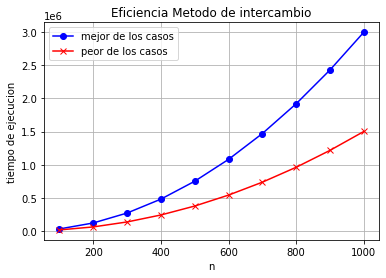

In [ ]:
import matplotlib.pyplot as plt

fig, grafica = plt.subplots(facecolor='w', edgecolor='k')
grafica.plot(nv,peor,marker='o',color='b')
grafica.plot(nv,mejor,marker='x',color='r')
grafica.set_xlabel('n')
grafica.set_ylabel('tiempo de ejecucion')
grafica.grid(True)
grafica.legend(['mejor de los casos','peor de los casos'])

plt.title('Eficiencia Metodo de intercambio')
plt.show()
